In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta
from statsmodels.tsa.stattools            import  adfuller
from statsmodels.tsa.stattools            import  pacf
from statsmodels.tsa.stattools            import  acf
from statsmodels.graphics.tsaplots        import  plot_pacf
from statsmodels.graphics.tsaplots        import  plot_acf
from statsmodels.graphics.gofplots        import  qqplot
from statsmodels.tsa.seasonal             import  seasonal_decompose
from statsmodels.tsa.arima_model          import  ARIMA
from statsmodels.tsa.statespace.sarimax   import  SARIMAX
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('train_(2).csv',parse_dates=['Month'],index_col='Month')
df.head()

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142


In [3]:
df.tail()

,Avg_sunspot_count
Month,
2010-08-01,30
2010-09-01,36
2010-10-01,34
2010-11-01,34
2010-12-01,25


In [4]:
plt.rcParams['figure.figsize'] = [15,7]

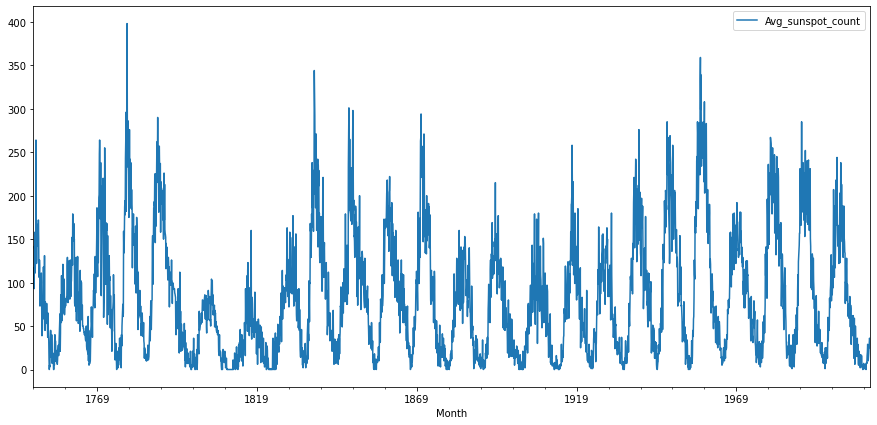

In [5]:
df.plot()

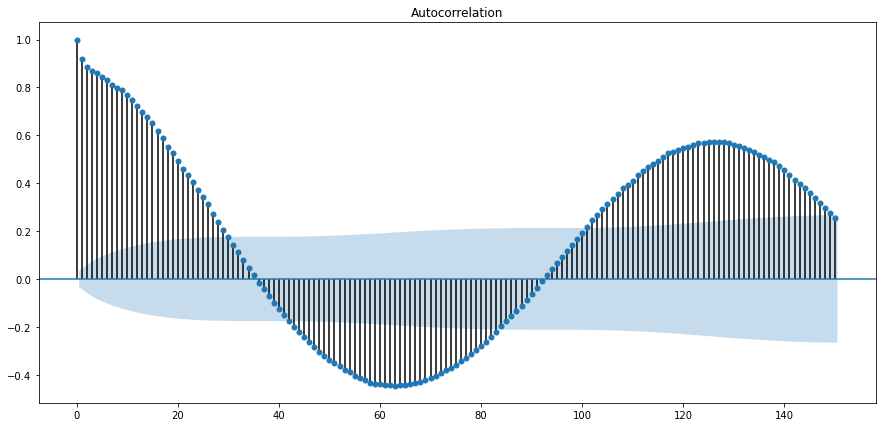

In [6]:
plot_acf(df,lags=150);

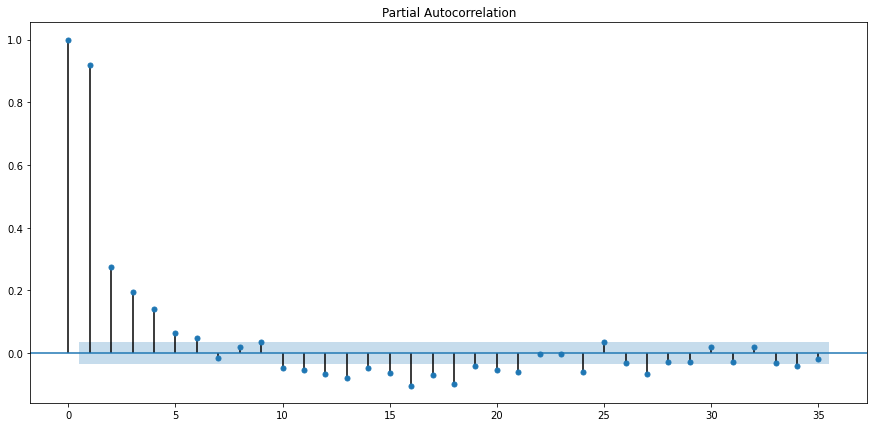

In [7]:
plot_pacf(df);

In [8]:
adfuller(df)

(-10.390308589912843,
 2.029076801912167e-18,
 28,
 3115,
 {'1%': -3.43245102630828,
  '5%': -2.862468302843017,
  '10%': -2.5672641578701927},
 28786.33743096589)

P value less than 0.05, thus the series is stationary

In [10]:
train_end = datetime(2005,12,1)
test_start = datetime(2006,1,1)

In [11]:
train = df[:train_end]
test = df[test_start:]

In [12]:
train

,Avg_sunspot_count
Month,
1749-01-01,97
1749-02-01,104
1749-03-01,117
1749-04-01,93
1749-05-01,142
...,...
2005-08-01,61
2005-09-01,37
2005-10-01,13


In [13]:
test

,Avg_sunspot_count
Month,
2006-01-01,21
2006-02-01,6
2006-03-01,17
2006-04-01,50
2006-05-01,37
2006-06-01,25
2006-07-01,22
2006-08-01,21
2006-09-01,24


In [32]:
import itertools
p = q = range(0, 12)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 0, 4)
Model: (0, 0, 5)
Model: (0, 0, 6)
Model: (0, 0, 7)
Model: (0, 0, 8)
Model: (0, 0, 9)
Model: (0, 0, 10)
Model: (0, 0, 11)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (0, 1, 5)
Model: (0, 1, 6)
Model: (0, 1, 7)
Model: (0, 1, 8)
Model: (0, 1, 9)
Model: (0, 1, 10)
Model: (0, 1, 11)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 0, 4)
Model: (1, 0, 5)
Model: (1, 0, 6)
Model: (1, 0, 7)
Model: (1, 0, 8)
Model: (1, 0, 9)
Model: (1, 0, 10)
Model: (1, 0, 11)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (1, 1, 5)
Model: (1, 1, 6)
Model: (1, 1, 7)
Model: (1, 1, 8)
Model: (1, 1, 9)
Model: (1, 1, 10)
Model: (1, 1, 11)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 0, 4)
Model: (2, 0, 5)
Model: (2, 0, 6)
Model: (2, 0, 7)
Model: (2, 0, 8)
Mod

In [33]:
AIC_score = pd.DataFrame(columns=['aram','AIC'])
AIC_score

,aram,AIC


In [34]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                AIC_score = AIC_score.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

ARIMA(0, 0, 0) - AIC:34816.870146438785
ARIMA(0, 0, 1) - AIC:32389.982000214797
ARIMA(0, 0, 2) - AIC:31217.08616017888
ARIMA(0, 0, 3) - AIC:30613.058109725695
ARIMA(0, 0, 4) - AIC:30226.50605187619
ARIMA(0, 0, 5) - AIC:29985.47940356668
ARIMA(0, 0, 6) - AIC:29714.562663811746
ARIMA(0, 0, 7) - AIC:29559.32205942233
ARIMA(0, 0, 8) - AIC:29504.088662135655
ARIMA(0, 0, 9) - AIC:29402.117486343537
ARIMA(0, 0, 10) - AIC:29307.26292400906
ARIMA(0, 0, 11) - AIC:29250.45869879274
ARIMA(0, 1, 0) - AIC:29301.072541265654
ARIMA(0, 1, 1) - AIC:28819.036376178912
ARIMA(0, 1, 2) - AIC:28771.13867883644
ARIMA(0, 1, 3) - AIC:28773.12163410562
ARIMA(0, 1, 4) - AIC:28769.228806704305
ARIMA(0, 1, 5) - AIC:28770.389187334054
ARIMA(0, 1, 6) - AIC:28764.587217917004
ARIMA(0, 1, 7) - AIC:28765.5120462338
ARIMA(0, 1, 8) - AIC:28752.761190091333
ARIMA(0, 1, 9) - AIC:28711.000051020965
ARIMA(0, 1, 10) - AIC:28706.7871255856
ARIMA(0, 1, 11) - AIC:28705.20951967971
ARIMA(1, 0, 0) - AIC:29181.42449665765
ARIMA(1, 0

ARIMA(9, 0, 0) - AIC:28754.23610545093
ARIMA(9, 0, 1) - AIC:28656.750654071868
ARIMA(9, 0, 2) - AIC:28603.29022059076
ARIMA(9, 0, 3) - AIC:28602.31483051081
ARIMA(9, 0, 4) - AIC:28613.13124155531
ARIMA(9, 0, 5) - AIC:28602.285989917167
ARIMA(9, 0, 6) - AIC:28597.320185739285
ARIMA(9, 0, 7) - AIC:28600.167411712617
ARIMA(9, 0, 8) - AIC:28601.537900049734
ARIMA(9, 1, 0) - AIC:28764.48959015833
ARIMA(9, 1, 1) - AIC:28713.976348633056
ARIMA(9, 1, 2) - AIC:28692.49768894494
ARIMA(9, 1, 3) - AIC:28691.86021096223
ARIMA(9, 1, 4) - AIC:28688.05240713457
ARIMA(9, 1, 5) - AIC:28694.538558483488
ARIMA(9, 1, 6) - AIC:28694.98620519253
ARIMA(10, 0, 0) - AIC:28749.59402387293
ARIMA(10, 0, 1) - AIC:28616.59549900137
ARIMA(10, 0, 2) - AIC:28600.02994527149
ARIMA(10, 0, 3) - AIC:28600.27939676788
ARIMA(10, 0, 4) - AIC:28602.048702881628
ARIMA(10, 0, 5) - AIC:28595.10110307151
ARIMA(10, 0, 6) - AIC:28605.356145010926
ARIMA(10, 0, 7) - AIC:28600.140339535923
ARIMA(10, 0, 8) - AIC:28596.779714533935
ARIMA

In [35]:
AIC_score.sort_values(by=['AIC'])

,aram,AIC,param
252,NaN,28568.533335,"(11, 1, 5)"
115,NaN,28576.925812,"(4, 1, 7)"
249,NaN,28576.975415,"(11, 1, 2)"
138,NaN,28577.943378,"(5, 1, 6)"
139,NaN,28578.808511,"(5, 1, 7)"
...,...,...,...
4,NaN,30226.506052,"(0, 0, 4)"
3,NaN,30613.058110,"(0, 0, 3)"
2,NaN,31217.086160,"(0, 0, 2)"
1,NaN,32389.982000,"(0, 0, 1)"


In [18]:
model = ARIMA(train, order=(11,1,5))

results_Arima = model.fit()

print(results_Arima.summary())

                              ARIMA Model Results                              
Dep. Variable:     D.Avg_sunspot_count   No. Observations:                 3083
Model:                 ARIMA(11, 1, 5)   Log Likelihood              -14266.267
Method:                        css-mle   S.D. of innovations             24.727
Date:                 Mon, 11 Oct 2021   AIC                          28568.533
Time:                         11:01:59   BIC                          28677.139
Sample:                     02-01-1749   HQIC                         28607.544
                          - 12-01-2005                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.0105      0.047      0.222      0.824      -0.082       0.103
ar.L1.D.Avg_sunspot_count      0.7352      0.024     31.176      0.000     

In [19]:
pred_start=test.index[0]
pred_end=test.index[-1]

In [20]:
ARIMA_predictions=results_Arima.predict(start=pred_start, end=pred_end)

In [21]:
ARIMA_predictions

2006-01-01   -11.163175
2006-02-01    -6.791271
2006-03-01     1.710454
2006-04-01     0.340023
2006-05-01     0.466624
2006-06-01     0.940994
2006-07-01    -4.692397
2006-08-01     2.018090
2006-09-01     2.857538
2006-10-01    -1.112188
2006-11-01     2.623494
2006-12-01     0.577098
2007-01-01     0.319321
2007-02-01     3.132652
2007-03-01     0.004938
2007-04-01     1.670762
2007-05-01     2.253941
2007-06-01     0.553570
2007-07-01     2.794795
2007-08-01     1.617130
2007-09-01     1.539411
2007-10-01     2.911416
2007-11-01     1.429566
2007-12-01     2.478886
2008-01-01     2.534806
2008-02-01     1.736174
2008-03-01     2.926413
2008-04-01     2.181250
2008-05-01     2.300921
2008-06-01     2.898277
2008-07-01     2.096673
2008-08-01     2.738856
2008-09-01     2.627903
2008-10-01     2.264410
2008-11-01     2.862799
2008-12-01     2.371216
2009-01-01     2.493644
2009-02-01     2.709760
2009-03-01     2.254721
2009-04-01     2.598009
2009-05-01     2.430372
2009-06-01     2

In [22]:
ARIMA_pred=ARIMA_predictions.cumsum()
ARIMA_pred

2006-01-01   -11.163175
2006-02-01   -17.954446
2006-03-01   -16.243991
2006-04-01   -15.903968
2006-05-01   -15.437344
2006-06-01   -14.496351
2006-07-01   -19.188747
2006-08-01   -17.170657
2006-09-01   -14.313119
2006-10-01   -15.425306
2006-11-01   -12.801812
2006-12-01   -12.224714
2007-01-01   -11.905393
2007-02-01    -8.772742
2007-03-01    -8.767804
2007-04-01    -7.097042
2007-05-01    -4.843100
2007-06-01    -4.289531
2007-07-01    -1.494736
2007-08-01     0.122394
2007-09-01     1.661806
2007-10-01     4.573222
2007-11-01     6.002788
2007-12-01     8.481673
2008-01-01    11.016480
2008-02-01    12.752653
2008-03-01    15.679067
2008-04-01    17.860316
2008-05-01    20.161238
2008-06-01    23.059515
2008-07-01    25.156188
2008-08-01    27.895044
2008-09-01    30.522947
2008-10-01    32.787358
2008-11-01    35.650157
2008-12-01    38.021373
2009-01-01    40.515017
2009-02-01    43.224777
2009-03-01    45.479498
2009-04-01    48.077507
2009-05-01    50.507879
2009-06-01    52

In [23]:
ARIMA_pred=pd.DataFrame(ARIMA_pred,columns=train.columns)
ARIMA_pred

,Avg_sunspot_count
2006-01-01,-11.163175
2006-02-01,-17.954446
2006-03-01,-16.243991
2006-04-01,-15.903968
2006-05-01,-15.437344
2006-06-01,-14.496351
2006-07-01,-19.188747
2006-08-01,-17.170657
2006-09-01,-14.313119
2006-10-01,-15.425306


In [24]:
predict_fc = ARIMA_pred.copy()
columns = train.columns
for col in columns:
    predict_fc[str(col)+'_forecast'] = train[col].iloc[-1] + predict_fc[str(col)]

In [25]:
columns

Index(['Avg_sunspot_count'], dtype='object')

In [26]:
predict_fc

,Avg_sunspot_count,Avg_sunspot_count_forecast
2006-01-01,-11.163175,47.836825
2006-02-01,-17.954446,41.045554
2006-03-01,-16.243991,42.756009
2006-04-01,-15.903968,43.096032
2006-05-01,-15.437344,43.562656
2006-06-01,-14.496351,44.503649
2006-07-01,-19.188747,39.811253
2006-08-01,-17.170657,41.829343
2006-09-01,-14.313119,44.686881
2006-10-01,-15.425306,43.574694


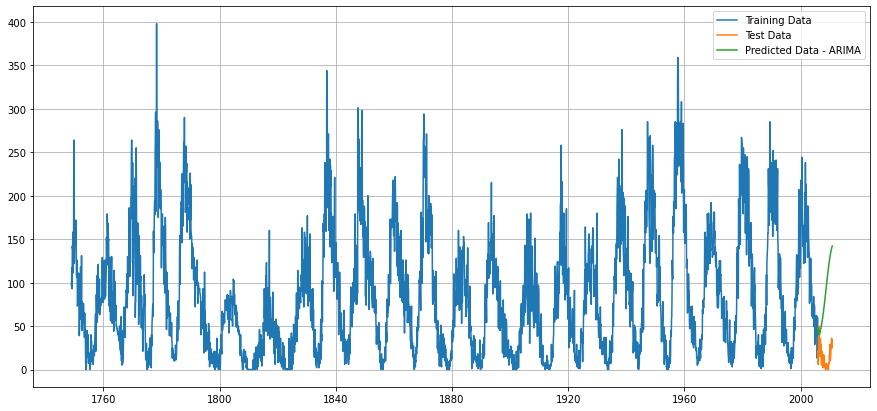

In [27]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predict_fc['Avg_sunspot_count_forecast'],label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [28]:
residuals = test['Avg_sunspot_count'] - predict_fc['Avg_sunspot_count_forecast']

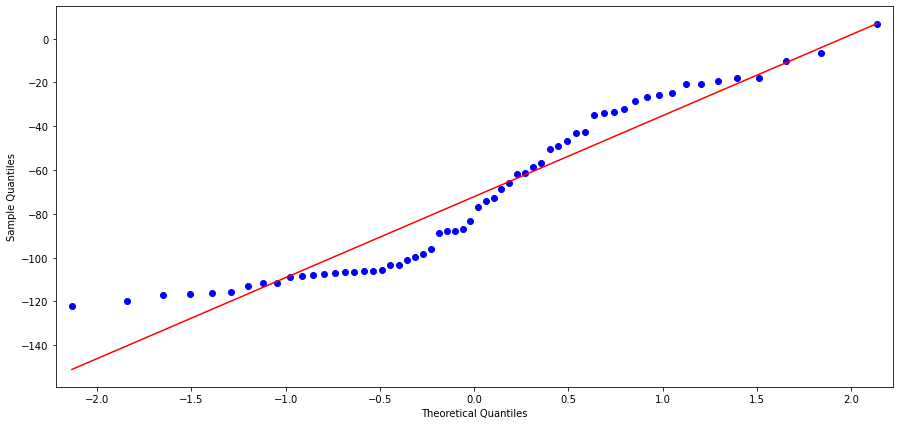

In [29]:
qqplot(residuals,line="s");

In [30]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],predict_fc['Avg_sunspot_count_forecast'],squared=False)
print('RMSE =',rmse)

RMSE = 81.06741032113374


In [31]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test['Avg_sunspot_count'],predict_fc['Avg_sunspot_count_forecast'])
print('MAPE = ',mape)

MAPE =  1.5260605630550284e+16


# SARIMA Model

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train,
                                order=(2,1,2),
                                seasonal_order=(2,1,2,24)
                                )
model_Sarima = model.fit()
print(model_Sarima.summary())

MemoryError: Unable to allocate 137. MiB for an array with shape (76, 76, 3109) and data type float64

Exception ignored in: 'statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.reset_filter_method'
Traceback (most recent call last):
  File "statsmodels\tsa\statespace\_kalman_smoother.pyx", line 975, in statsmodels.tsa.statespace._kalman_smoother.dKalmanSmoother.allocate_arrays
MemoryError: Unable to allocate 137. MiB for an array with shape (76, 76, 3109) and data type float64


In [34]:
SARIMA_predictions=model_Sarima.predict(start=pred_start, end=pred_end)

In [35]:
SARIMA_predictions

2008-01-01    8.268263
2008-02-01    9.870478
2008-03-01    7.914741
2008-04-01    7.012397
2008-05-01    7.521100
2008-06-01    3.880333
2008-07-01    3.623571
2008-08-01    3.902606
2008-09-01    2.653805
2008-10-01    2.702088
2008-11-01   -0.739127
2008-12-01    2.490612
2009-01-01   -2.627835
2009-02-01   -0.319358
2009-03-01   -3.455746
2009-04-01   -1.913398
2009-05-01    0.510842
2009-06-01    3.322989
2009-07-01    2.175418
2009-08-01    3.463828
2009-09-01    2.608599
2009-10-01    1.960828
2009-11-01    1.327103
2009-12-01    0.557660
2010-01-01   -3.059543
2010-02-01    1.177855
2010-03-01    0.734556
2010-04-01    0.761529
2010-05-01    1.943329
2010-06-01   -1.841081
2010-07-01   -1.090218
2010-08-01   -0.786750
2010-09-01   -1.303026
2010-10-01   -1.026280
2010-11-01   -4.218611
2010-12-01   -1.155109
Freq: MS, dtype: float64

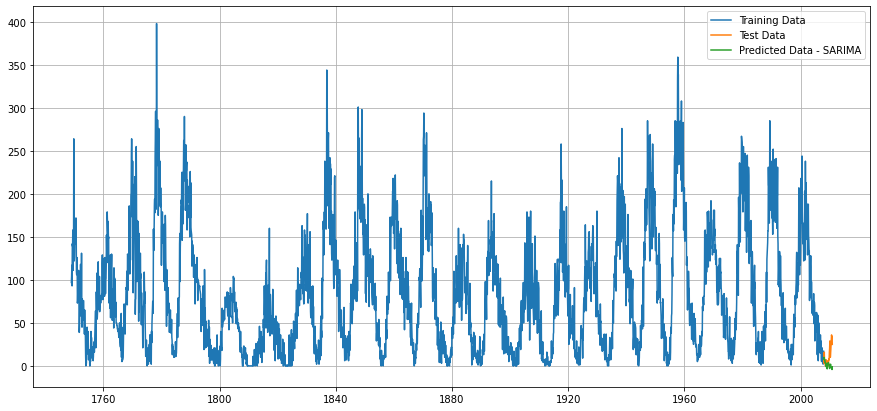

In [36]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,SARIMA_predictions,label='Predicted Data - SARIMA')
plt.legend(loc='best')
plt.grid();

In [37]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg_sunspot_count'],SARIMA_predictions, squared=False)
print(rmse)

16.28696738057191


In [38]:
mape = mean_absolute_percentage_error(SARIMA_predictions,test['Avg_sunspot_count'])
print('MAPE = ',mape)

MAPE =  8.907841714726546


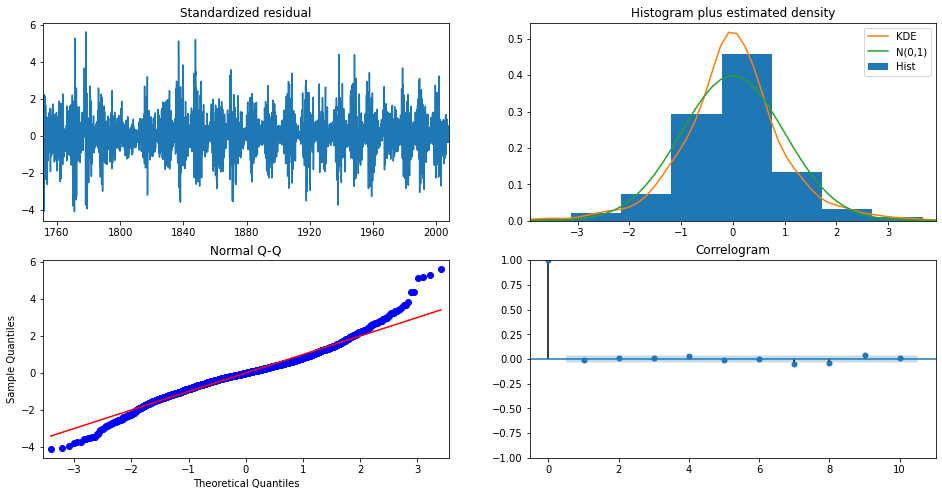

In [39]:
model_Sarima.plot_diagnostics(figsize=(16, 8))
plt.show()

In [11]:
model = sm.tsa.statespace.SARIMAX(df,
                                order=(2,1,3),
                                seasonal_order=(1,1,2,24),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_Sarima = model.fit()
print(model_Sarima.summary())

NameError: name 'sm' is not defined

In [23]:
test = pd.read_csv('test_(2).csv')
test.head()

,Month
0,01-01-2011
1,02-01-2011
2,03-01-2011
3,04-01-2011
4,05-01-2011


In [24]:
predictions  = model_Sarima.predict(start='01/01/2011', end='12/01/2020')
predictions = pd.DataFrame(predictions,columns=['predictions']).reset_index()
predictions


,index,predictions
0,2011-01-01,24.924723
1,2011-02-01,29.665918
2,2011-03-01,28.312696
3,2011-04-01,31.307957
4,2011-05-01,35.094119
...,...,...
115,2020-08-01,40.992641
116,2020-09-01,40.239702
117,2020-10-01,40.721994
118,2020-11-01,37.610446


In [25]:
test['Avg_sunspot_count'] = predictions['predictions']
test

,Month,Avg_sunspot_count
0,01-01-2011,24.924723
1,02-01-2011,29.665918
2,03-01-2011,28.312696
3,04-01-2011,31.307957
4,05-01-2011,35.094119
...,...,...
115,08-01-2020,40.992641
116,09-01-2020,40.239702
117,10-01-2020,40.721994
118,11-01-2020,37.610446


In [26]:
test.to_csv('Submission2_SushmaD.csv',index=False)